## You are given house_price.csv which contains property prices in the city of Bangalore. You need to examine price per square feet do the following:

### 1.Basic EDA

In [53]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv("E:/entri/DSML projects/ml/house_price.csv")
# displaying first few rows
data.head()


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [55]:
# summary statistics
data.describe()


,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [56]:
data.value_counts()

location      size       total_sqft  bath  price    bhk  price_per_sqft
Haralur Road  2 BHK      1243.0      2.0   46.00    2    3700              18
TC Palaya     3 Bedroom  1200.0      2.0   66.00    3    5500              12
other         3 BHK      1464.0      3.0   56.00    3    3825              12
Chandapura    1 BHK      645.0       1.0   16.45    1    2550              11
HSR Layout    2 BHK      1140.0      2.0   46.00    2    4035               9
                                                                           ..
other         8 Bedroom  3500.0      6.0   120.00   8    3428               1
                         12000.0     9.0   1900.00  8    15833              1
              9 BHK      2400.0      8.0   325.00   9    13541              1
                         4500.0      9.0   500.00   9    11111              1
              9 Bedroom  4500.0      9.0   166.00   9    3688               1
Name: count, Length: 12151, dtype: int64

In [57]:
# check missing values
data.isnull().sum() 

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

### No Null Values Detected

In [58]:
#check duplicates
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
13195    False
13196    False
13197    False
13198    False
13199     True
Length: 13200, dtype: bool

In [59]:
datas=data.drop_duplicates()

In [60]:
datas.duplicated().sum()

np.int64(0)

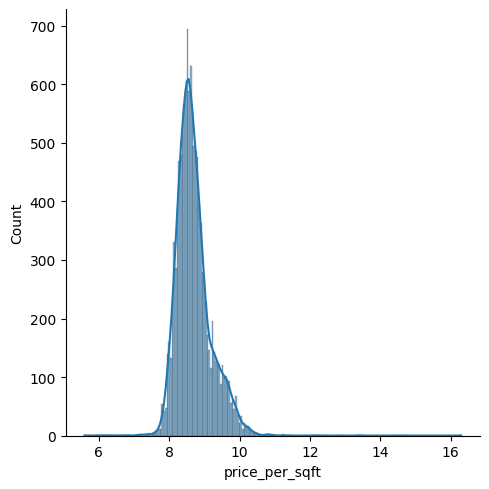

12151

In [61]:
df=pd.DataFrame(datas)
df['price_per_sqft'] = np.log1p(df['price_per_sqft'])
sns.displot(df['price_per_sqft'],kde='false')
plt.show()
df.head()
len(df)

##### From the displot the graph is right skewed and have outliers. 
##### For the effective representation of the outliers we can use box plot

Text(0.5, 0, 'Price per Sqft')

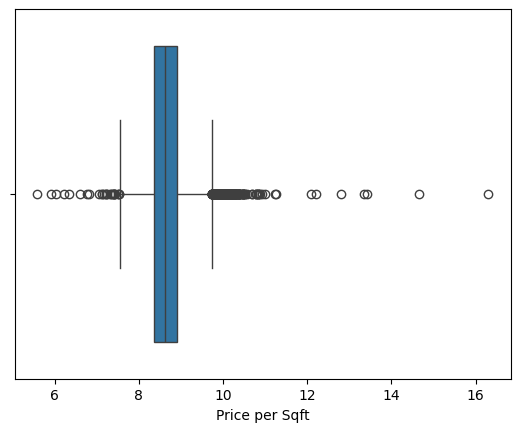

In [62]:
sns.boxplot(df['price_per_sqft'],orient='h')
plt.xlabel('Price per Sqft')

#### 2. Detect the outliers using following methods and remove it using methods like trimming / capping/ imputation using mean or median
#### a) Mean and Standard deviation


# Mean And Standard Deviation

In [63]:
df['price_per_sqft'] = df['price_per_sqft'].astype(float)

# Calculate the mean of the column
m = df['price_per_sqft'].mean()
m

np.float64(8.693733779647003)

In [64]:
s=df.price_per_sqft.std()
s

np.float64(0.4946353467551613)

In [65]:
lower=m-3*s
lower

np.float64(7.209827739381518)

In [66]:
upper=m+3*s
upper

np.float64(10.177639819912487)

In [67]:
#Outliers
df1=df[(df.price_per_sqft<7.2) | (df.price_per_sqft>10.17)]


Text(0.5, 0, 'price_per_sqft')

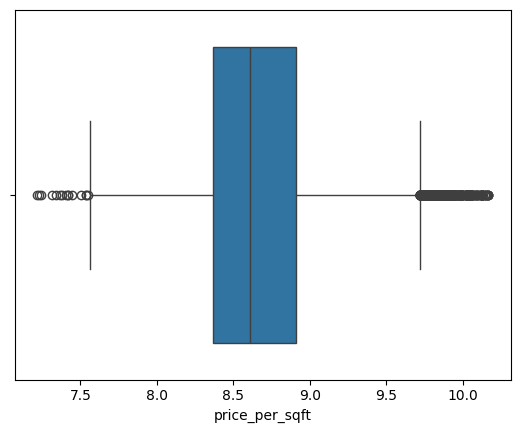

In [69]:
#trimming
MNSD=df[(df.price_per_sqft>7.2) & (df.price_per_sqft<10.17)]
len(MNSD)
sns.boxplot(MNSD['price_per_sqft'],orient='h')
plt.xlabel('price_per_sqft')

12151

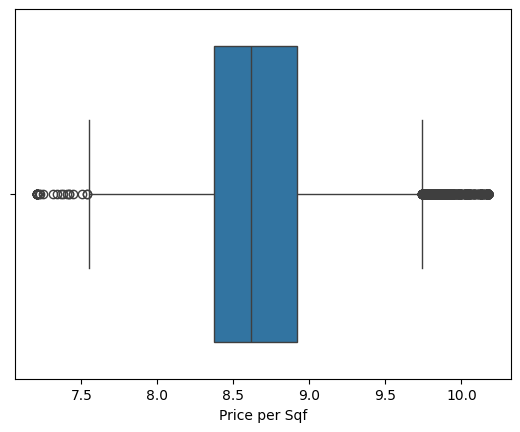

In [70]:
#Capping
newdf=df.copy()
newdf.loc[newdf['price_per_sqft']>upper, 'price_per_sqft']=upper
newdf.loc[newdf['price_per_sqft']<lower, 'price_per_sqft']=lower
sns.boxplot(newdf['price_per_sqft'],orient='h')
plt.xlabel("Price per Sqf")
len(newdf)


<Axes: xlabel='price_per_sqft'>

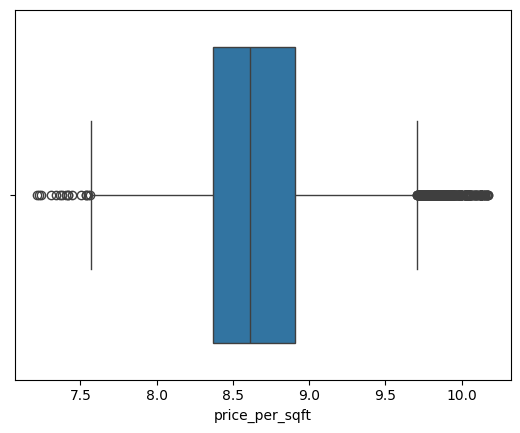

In [71]:
#imputation
new=df.copy()

new.loc[new['price_per_sqft']>upper, 'price_per_sqft']=m
new.loc[new['price_per_sqft']<lower, 'price_per_sqft']=m
sns.boxplot(new['price_per_sqft'],orient='h')



#### d) Z Score method

In [72]:
upper_limit= df['price_per_sqft'].mean() + 3*df['price_per_sqft'].std()
lower_limit= df['price_per_sqft'].mean() - 3*df['price_per_sqft'].std()
print(upper_limit,lower_limit)

10.177639819912487 7.209827739381518


In [73]:
#outliers
df.loc[(df['price_per_sqft']<7.2) | (df['price_per_sqft']>10.12)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,10.498884
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,10.414333
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,10.206698
345,other,3 Bedroom,11.0,3.0,74.0,3,13.419096
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,5.918894
...,...,...,...,...,...,...,...
12948,other,10 Bedroom,7150.0,13.0,3600.0,10,10.826754
13013,other,4 Bedroom,1200.0,5.0,350.0,4,10.280793
13078,other,4 Bedroom,9200.0,4.0,2600.0,4,10.249238
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,10.463132


In [74]:
#Z score outlier trimming
dfree=df.loc[(df['price_per_sqft']>7.2) & (df['price_per_sqft']<10.12)]
dfree
print("before trim",len(df))
print("after",len(dfree))

before trim 12151
after 12025


12151

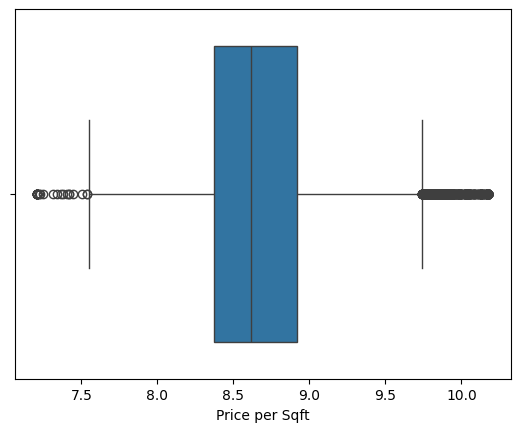

In [75]:
#Capping in Z-Score
newdf=df.copy()
newdf.loc[newdf['price_per_sqft']>upper, 'price_per_sqft']=upper
newdf.loc[newdf['price_per_sqft']<lower, 'price_per_sqft']=lower
sns.boxplot(newdf['price_per_sqft'],orient='h')
plt.xlabel("Price per Sqft")
len(newdf)


12151

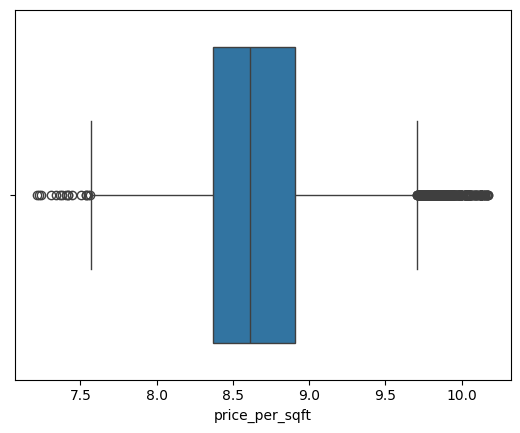

In [76]:
#imputation in z-score
new=df.copy()

new.loc[new['price_per_sqft']>upper, 'price_per_sqft']=m
new.loc[new['price_per_sqft']<lower, 'price_per_sqft']=m
sns.boxplot(new['price_per_sqft'],orient='h')
plt.xlabel('price_per_sqft')
len(new['price_per_sqft'])

#### c) IQR(Inter quartile range method)

In [77]:
q1=df['price_per_sqft'].quantile(0.25)
q3=df['price_per_sqft'].quantile(0.75)
iqr= q3-q1
q1,q3,iqr

(np.float64(8.369388996647842),
 np.float64(8.91757874480145),
 np.float64(0.5481897481536073))

In [78]:
lower= q1-(1.5 * iqr)
upper= q3+(1.5 * iqr)
upper,lower

(np.float64(9.73986336703186), np.float64(7.547104374417431))

In [79]:
#IQR Trimming
dfree=df.loc[(df['price_per_sqft']>lower) & (df['price_per_sqft']<upper)]
dfree
print("before trim",len(df))
print("after",len(dfree))
dfree

before trim 12151
after 11683


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,8.216088
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,8.437284
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,8.367765
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,8.739697
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,8.354910
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,8.784315
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,8.808369
13196,other,4 BHK,3600.0,5.0,400.00,4,9.315781
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,8.567696


12151

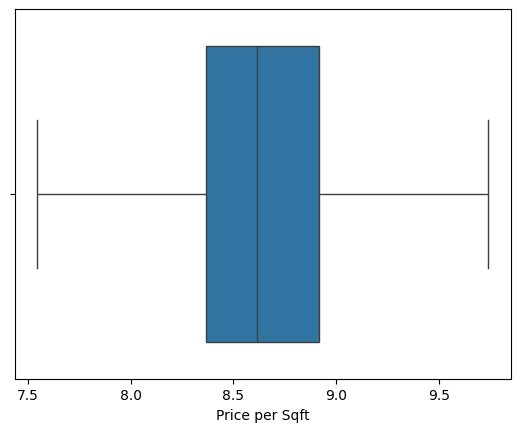

In [80]:
#Capping in IQR
newdf=df.copy()
newdf.loc[newdf['price_per_sqft']>upper, 'price_per_sqft']=upper
newdf.loc[newdf['price_per_sqft']<lower, 'price_per_sqft']=lower
sns.boxplot(newdf['price_per_sqft'],orient='h')
plt.xlabel("Price per Sqft")
len(newdf)


12151

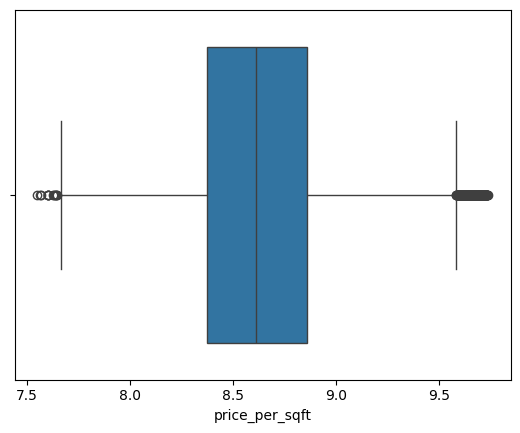

In [81]:
#imputation in iqr
new=df.copy()
median=new['price_per_sqft'].median()

new.loc[new['price_per_sqft']>upper, 'price_per_sqft']=median
new.loc[new['price_per_sqft']<lower, 'price_per_sqft']=median
sns.boxplot(new['price_per_sqft'],orient='h')
plt.xlabel('price_per_sqft')
len(new['price_per_sqft'])

#### b)Percentile method

In [82]:
upper=df['price_per_sqft'].quantile(0.95)
lower=df['price_per_sqft'].quantile(0.05)
upper,lower


(np.float64(9.65509029374725), np.float64(8.055475141757274))

In [83]:
#percentile method outliers
out=df.loc[(df['price_per_sqft']<lower) | (df['price_per_sqft']>upper)]
out



,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,9.808187
9,other,6 Bedroom,1020.0,6.0,370.00,6,10.498884
20,Kengeri,1 BHK,600.0,1.0,15.00,1,7.824446
41,Sarjapur Road,3 BHK,1254.0,3.0,38.00,3,8.016648
45,HSR Layout,8 Bedroom,600.0,9.0,200.00,8,10.414333
...,...,...,...,...,...,...,...
13121,Electronic City Phase II,3 BHK,1651.0,3.0,49.53,3,8.006701
13141,other,3 Bedroom,2000.0,2.0,360.00,3,9.798183
13142,other,2 BHK,1140.0,1.0,185.00,2,9.694555
13155,Kothannur,4 Bedroom,1600.0,4.0,45.00,4,7.942007


In [84]:
#percentile Trimming
dfree=df.loc[(df['price_per_sqft']>lower) & (df['price_per_sqft']<upper)]
dfree
print("before trim",len(df))
print("after",len(dfree))
dfree

before trim 12151
after 10928


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,8.216088
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,8.437284
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,8.367765
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,8.739697
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,8.354910
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,8.784315
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,8.808369
13196,other,4 BHK,3600.0,5.0,400.00,4,9.315781
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,8.567696


10928

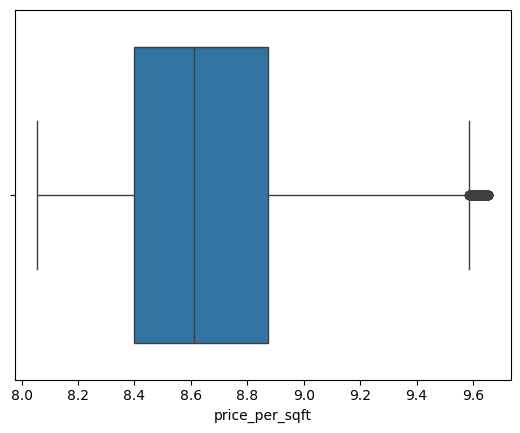

In [85]:
sns.boxplot(dfree['price_per_sqft'],orient='h')
plt.xlabel('price_per_sqft')
len(dfree['price_per_sqft'])

12151

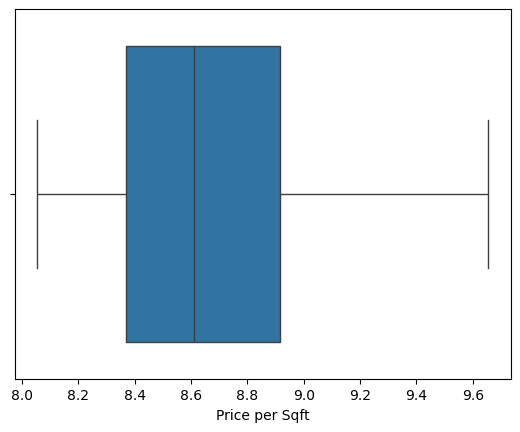

In [86]:
#Capping in PERCENTILE
newdf=df.copy()
newdf.loc[newdf['price_per_sqft']>upper, 'price_per_sqft']=upper
newdf.loc[newdf['price_per_sqft']<lower, 'price_per_sqft']=lower
sns.boxplot(newdf['price_per_sqft'],orient='h')
plt.xlabel("Price per Sqft")
len(newdf)

12151

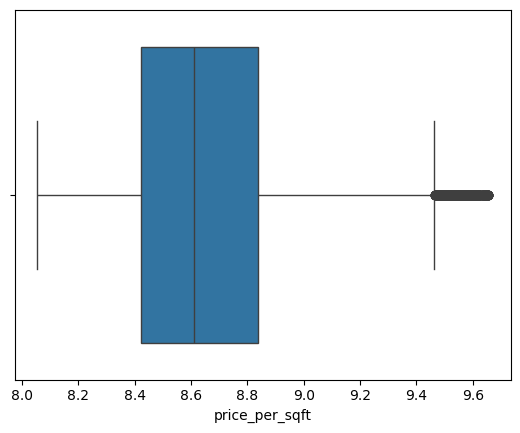

In [87]:
#imputation in PERCENTILE
new=df.copy()
median=new['price_per_sqft'].median()

new.loc[new['price_per_sqft']>upper, 'price_per_sqft']=median
new.loc[new['price_per_sqft']<lower, 'price_per_sqft']=median
sns.boxplot(new['price_per_sqft'],orient='h')
plt.xlabel('price_per_sqft')
len(new['price_per_sqft'])

<Axes: xlabel='price_per_sqft', ylabel='Count'>

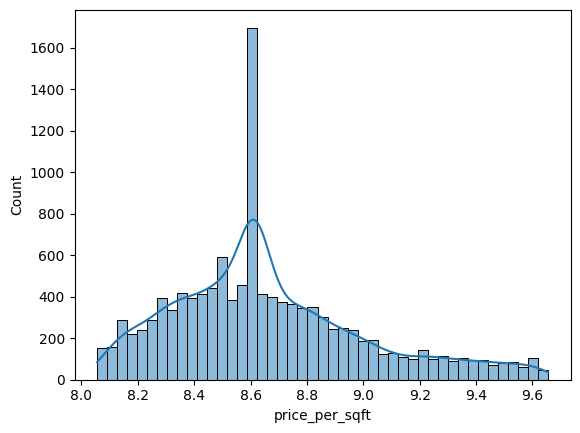

In [88]:
sns.histplot(new['price_per_sqft'],kde='True')

<Axes: xlabel='price_per_sqft', ylabel='Count'>

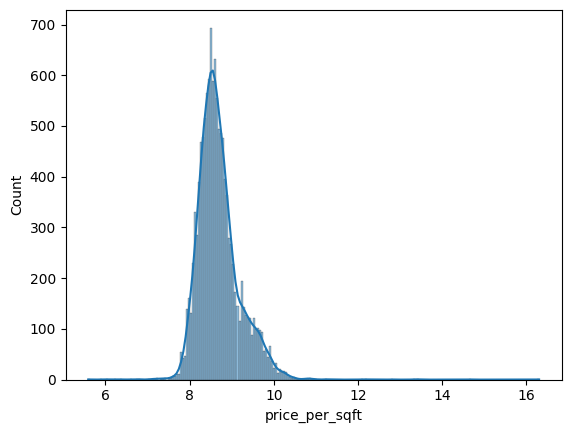

In [89]:
# Q4. Draw histplot to check the normality of the column(price per sqft column) and perform transformations if needed. Check the skewness and kurtosis before and after the transformation.
sns.histplot(df['price_per_sqft'],kde='True')

In [90]:
skewness_before = df['price_per_sqft'].skew()
kurtosis_before = df['price_per_sqft'].kurtosis()

print(f"Skewness before transformation: {skewness_before}")
print(f"Kurtosis before transformation: {kurtosis_before}")

Skewness before transformation: 1.401043314411164
Kurtosis before transformation: 9.408799464773509


### LOG TRANSFORMATION

In [91]:
df['price_per_sqft']=np.log(df['price_per_sqft'])
df['price_per_sqft']

0        2.106094
1        2.132660
2        2.124387
3        2.167875
4        2.122849
           ...   
13194    2.172968
13195    2.175702
13196    2.231710
13197    2.147999
13198    2.224659
Name: price_per_sqft, Length: 12151, dtype: float64

<Axes: xlabel='price_per_sqft', ylabel='Count'>

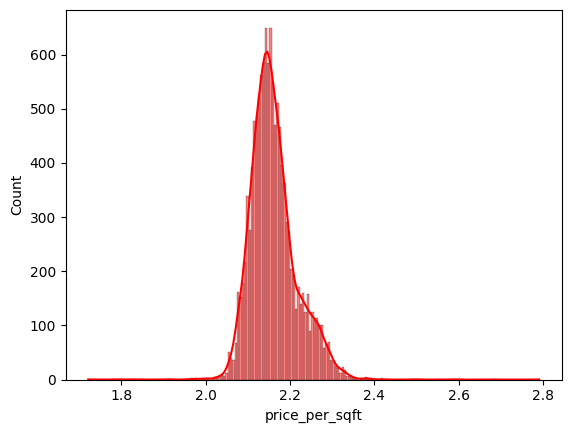

In [92]:
sns.histplot(df['price_per_sqft'],kde='false',color='r')

In [93]:
df['price_per_sqft'].skew()

np.float64(0.8409139461702275)

In [94]:
from scipy.stats import skew, kurtosis
kurtosis(df['price_per_sqft'],fisher=False)

np.float64(7.368729322411906)

### Check the correlation between all the numerical columns and plot heatmap.

In [96]:
df1=df.drop(["location","size"],axis=1)
correl=df1.corr()
correl

,total_sqft,bath,price,bhk,price_per_sqft
total_sqft,1.000000,0.386694,0.572516,0.339936,0.086686
bath,0.386694,1.000000,0.448802,0.898875,0.422607
price,0.572516,0.448802,1.000000,0.390008,0.574484
bhk,0.339936,0.898875,0.390008,1.000000,0.402173
price_per_sqft,0.086686,0.422607,0.574484,0.402173,1.000000


<Axes: >

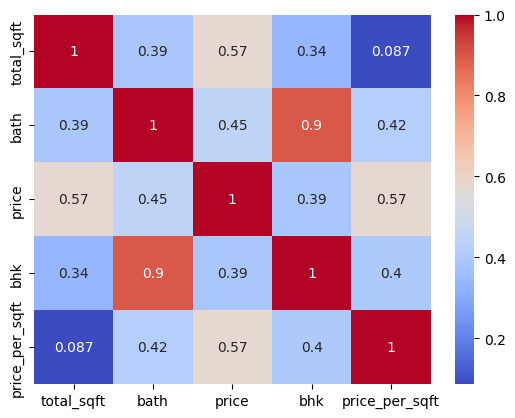

In [97]:
sns.heatmap(correl,annot=True,cmap='coolwarm')

### Scatter plot between the variables to check the correlation between them

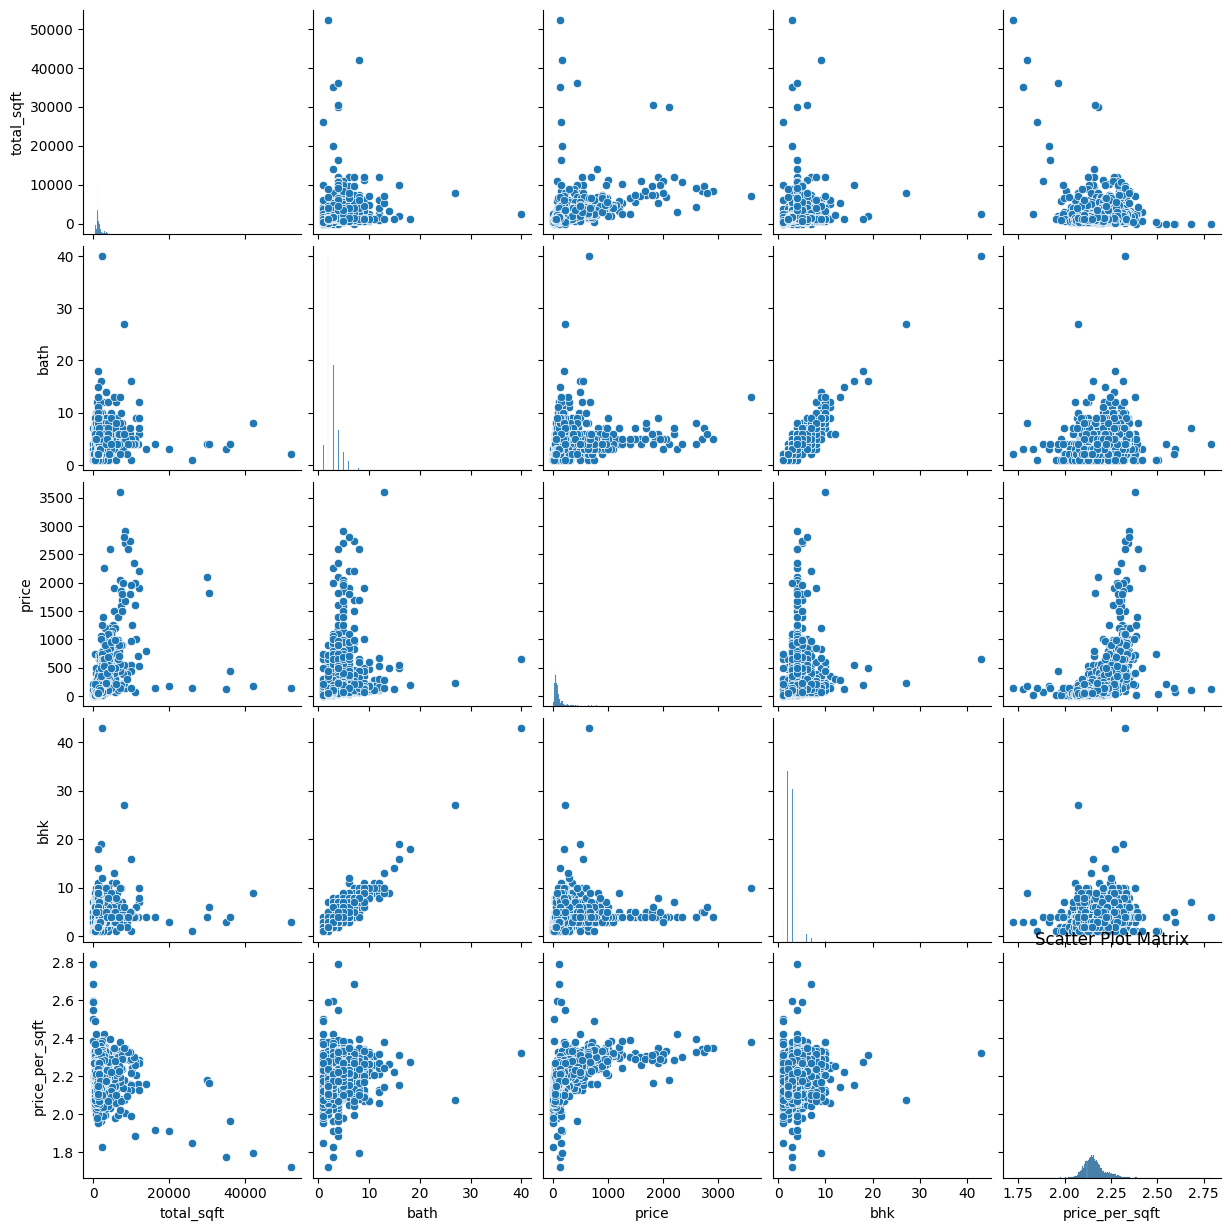

In [100]:

sns.pairplot(df1)
plt.title('Scatter Plot Matrix')
plt.show()
